<a href="https://colab.research.google.com/github/itsvipa/ctm-codebar-nov-22-planning/blob/main/Copy_of_codebar_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Living (Python for Data Engineering)

In this session we’ll be taking a look at harnessing the power of data to aid decision making for things like groceries and everyday purchases. We’ll get hands on with sourcing and making sense of the data, and then using it to answer some interesting questions, using techniques from fields like optimisation and machine learning.

The goal of this exercise is to you python libraries like pandas, do the following:

## Before you start:

Run the command below to download the data needed for this exercise; There should be three .csv files downloaded: uk_products.csv and products.csv and prices.csv

In [1]:
!git clone https://github.com/itsvipa/ctm-codebar-nov-22-planning.git

Cloning into 'ctm-codebar-nov-22-planning'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 9), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
import pandas as pd

### Task One - Find cheapest supermarket for shopping basket?:

In the last decade, the average shopping basket has increased by {insert percentage}. Using the data pulled from GitHub, find the the cheapest overall supermarket for the basket provided below. 

In [3]:
basket = [
    [28798, "Tetley Original Tea Bags x240"], 
    [34398, "Cravendale Whole Milk"],
    [30904, "Kellogg's Rice Krispies"],
    [26457,	"Tropicana Pineapple Juice"],
    [28095, "Diet Coke Bottles"],
    [33442, "Loyd Grossman Tomato & Basil Pasta Sauce"],
    [27161,	"Strings & Things Cheestrings Cheese Snack"],
    [31863,	"Mars 4 pack Ice Cream Bars"],
    [32002,	"Tilda Microwave Coconut Basmati Rice"],
    [86547,	"Knorr Chicken Stock Pot 4 Pack"],
    [84095,	"Arla skyr Fat Free Natural Yogurt"],
    [33255,	"Alpro Almond Long Life Drink"],
    [43809,	"Energizer Max 9V Batteries"],
    [25828,	"Robinsons Crushed Lime & Mint Fruit Cordial"],
    [32248,	"Sensations Balsamic Vinegar & Caramelised Onion Sharing Crisps"],
    [47361,	"Lynx Africa Body Spray Deodorant Aerosol"],
    [32774,	"Heinz Spaghetti"],
    [92101,	"Chicago Town Cheese Pizza Tomato Stuffed Crust Takeaway"],
    [110105, "McCain Home Chips Straight"],
    [44797,	"Fairy Original Washing Up Liquid"],
    [40915,	"Fairy Non Bio Washing Liquid for Sensitive Skin 1.33L 38 Washes	"],
    [24091,	"Nissin Soba Yakitori Noodles"],
    [42002,	"Yakult Yogurt Drink"],	
    [83092,	"Jammie Dodgers"],
    [20272,	"Quorn Vegan Chicken Free Slices 100G"],	
    [33492,	"Linda McCartney's Mozzarella Quarter Pounder Burger"],
    [51657,	"Purina ONE Adult Dry Cat Food Chicken & Wholegrains"],
    [24341,	"Birds Eye 4 Original Beef Burgers With Onions"],
    [109986, "Cathedral City Lighter Mature Cheese"],
    [27526,	"Filippo Berio Mild & Light Olive Oil"],
    [45238, "Bfree Pitta Breads Stone Baked Pittas"]
    ]

print(len(basket))

31


In [4]:
product_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/products.csv")
price_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/prices.csv")

In [5]:
product_df

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
0,20100,Lucozade Sport Orange,NaN,750,ml,"['302012236', '50368011', '1000273982470']",1
1,20101,Red Bull Sugarfree,NaN,473,ml,"['298026024', '7922076', '576040011']",3
2,20102,All Shook Up Spritz Pink Grapefruit & Lavender...,NaN,NaN,NaN,['305986034'],0
3,20103,Gatorade Orange 500ml,NaN,NaN,NaN,"['287043066', '8008530']",0
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,NaN,330,ml,"['272855015', '7720116', '14533011', '34395901...",3
...,...,...,...,...,...,...,...
81665,149214,TRIP CBD Infused Elderflower Mint,NaN,250,ml,"['8040121', '563191011']",2
81666,149215,TRIP CBD Infused Lemon Basil,NaN,250,ml,"['8040125', '563190011']",2
81667,149216,TRIP CBD Infused Peach Ginger,NaN,250,ml,"['8040137', '563192011']",2
81668,149596,Smirnoff Red Label Vodka 35cl,NaN,350,ml,"['256554689', '2412368', '119513011']",2


In [7]:
price_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z
1,20101,Red Bull Sugarfree,morrisons,True,2.30,0.49,100.0,ml,2022-10-26T18:00:00.000Z
2,20101,Red Bull Sugarfree,sainsburys,True,2.30,0.49,100.0,ml,2022-10-26T11:00:00.000Z
3,20101,Red Bull Sugarfree,tesco,False,3.40,0.49,100.0,ml,2022-10-26T14:00:00.000Z
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,sainsburys,True,1.40,0.42,100.0,ml,2022-10-26T12:00:00.000Z
...,...,...,...,...,...,...,...,...,...
94855,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z
94856,149216,TRIP CBD Infused Peach Ginger,sainsburys,True,2.00,0.80,100.0,ml,2022-10-26T12:00:00.000Z
94857,149596,Smirnoff Red Label Vodka 35cl,tesco,True,10.00,2.86,100.0,ml,2022-10-26T10:00:00.000Z
94858,149596,Smirnoff Red Label Vodka 35cl,sainsburys,True,10.50,3.00,100.0,ml,2022-10-26T11:00:00.000Z


In [6]:
basket_ids = [i[0] for i in basket]
product_basket = product_df[product_df['id'].isin(basket_ids)]
product_basket

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
171,20272,Quorn Vegan Chicken Free Slices 100G,NaN,100,g,"['1000036534591', '409621011', '300544928', '7...",7
3920,24091,Nissin Soba Yakitori Noodles,NaN,89,g,"['7880330', '358649011', '394012011', '9100030...",7
4157,24341,Birds Eye 4 Original Beef Burgers With Onions,NaN,227,g,"['39291', '111245011', '254750569', '7062745',...",7
5577,25828,Robinsons Crushed Lime & Mint Fruit Cordial,NaN,500,ml,"['298026060', '7893476', '1000000581841', '395...",7
6168,26457,Tropicana Pineapple Juice,NaN,850,ml,"['287294534', '910001811525', '7736698', '2807...",7
6829,27161,Strings & Things Cheestrings Cheese Snack,8.0,160,g,"['910000563392', '111504011', '273196994', '75...",8
7170,27526,Filippo Berio Mild & Light Olive Oil,NaN,500,ml,"['3817506', '33508011', '112993011', '25495826...",7
7700,28095,Diet Coke Bottles,NaN,1000,ml,"['252047858', '3723975', '20947011', '11392001...",7
8338,28798,Tetley Original Tea Bags x240,240.0,750,g,"['256093024', '3124932', '113676011', '32744',...",8
10318,30904,Kellogg's Rice Krispies,NaN,700,g,"['910000396129', '7427688', '112094011', '2681...",7


In [8]:
basket_prices = price_df[price_df['id'].isin(basket_ids)]
basket_prices

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.39,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.40,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.40,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.40,100.0,g,2022-10-26T10:00:00.000Z
...,...,...,...,...,...,...,...,...,...
81291,110105,McCain Home Chips Straight,tesco,True,3.00,0.25,100.0,g,2022-10-26T07:00:00.000Z
81292,110105,McCain Home Chips Straight,morrisons,True,3.99,0.25,100.0,g,2022-10-26T16:00:00.000Z
81293,110105,McCain Home Chips Straight,asda,True,4.00,0.25,100.0,g,2022-10-26T15:00:00.000Z
81294,110105,McCain Home Chips Straight,sainsburys,True,4.00,0.25,100.0,g,2022-10-26T14:00:00.000Z


In [9]:
basket_prices['retailer'].unique()

array(['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco',
       'waitrose', 'aldi'], dtype=object)

In [10]:
basket_prices.groupby(['retailer']).count()

,id,name,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
retailer,,,,,,,,
aldi,3,3,3,3,3,3,3,3
asda,31,31,31,31,31,31,31,31
coop,31,31,0,31,0,0,0,31
morrisons,31,31,31,31,31,31,31,31
ocado,31,31,31,31,31,31,31,31
sainsburys,31,31,31,31,31,31,31,31
tesco,31,31,31,31,31,31,31,31
waitrose,31,31,31,31,31,31,31,31


In [11]:
retailers_to_test = ['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose']

compare_price_basket = basket_prices[basket_prices['retailer'].isin(retailers_to_test)]

compare_price_basket.sort_values('price').drop_duplicates(['id'])

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
63079,83092,Jammie Dodgers,waitrose,True,0.50,0.360,100.0,g,2022-10-26T10:00:00.000Z
24674,32774,Heinz Spaghetti,sainsburys,True,0.85,0.210,100.0,g,2022-10-26T11:00:00.000Z
23037,32002,Tilda Microwave Coconut Basmati Rice,asda,True,0.95,0.380,100.0,g,2022-10-26T10:00:00.000Z
65383,86547,Knorr Chicken Stock Pot 4 Pack,tesco,True,1.19,1.070,100.0,g,2022-10-26T14:00:00.000Z
15737,28095,Diet Coke Bottles,coop,NaN,1.25,NaN,NaN,NaN,2022-10-26T10:00:00.000Z
63699,84095,Arla skyr Fat Free Natural Yogurt,asda,True,1.25,0.280,100.0,g,2022-10-26T12:00:00.000Z
7496,24091,Nissin Soba Yakitori Noodles,sainsburys,True,1.50,1.690,100.0,g,2022-10-26T11:00:00.000Z
26181,33442,Loyd Grossman Tomato & Basil Pasta Sauce,asda,True,1.50,0.430,100.0,g,2022-10-26T09:00:00.000Z
26256,33492,Linda McCartney's Mozzarella Quarter Pounder B...,tesco,True,1.50,1.100,100.0,g,2022-10-26T08:00:00.000Z
22797,31863,Mars 4 pack Ice Cream Bars,sainsburys,True,1.75,0.860,100.0,ml,2022-10-26T11:00:00.000Z


In [12]:
compare_price_basket.groupby('retailer').sum()['price']

retailer
asda          80.98
coop          96.20
morrisons     87.31
ocado         92.70
sainsburys    80.65
tesco         81.38
waitrose      95.75
Name: price, dtype: float64

### Task Two - How much more can you save if you split the basket between supermarkets (2 stores, 3 stores)?

NOTE - Should this actually be the first task, I feel like this is simpler/a nice way two each them into iteration. 

In [13]:
import itertools

retailer_pairs = itertools.combinations(retailers_to_test, 2)

def get_cheapest_basket(retailer_list):
  retailer_price_basket = compare_price_basket[compare_price_basket['retailer'].isin(retailer_list)]
  return retailer_price_basket.sort_values('price').drop_duplicates(['id'])['price'].sum()

pair_basket_prices = [[r, get_cheapest_basket(r)] for r in retailer_pairs]
pair_basket_prices

[[('morrisons', 'asda'), 78.6],
 [('morrisons', 'coop'), 83.54],
 [('morrisons', 'ocado'), 82.46],
 [('morrisons', 'sainsburys'), 77.03],
 [('morrisons', 'tesco'), 78.51],
 [('morrisons', 'waitrose'), 84.04],
 [('asda', 'coop'), 77.68],
 [('asda', 'ocado'), 78.93],
 [('asda', 'sainsburys'), 77.44],
 [('asda', 'tesco'), 76.66],
 [('asda', 'waitrose'), 80.13],
 [('coop', 'ocado'), 86.14999999999999],
 [('coop', 'sainsburys'), 78.6],
 [('coop', 'tesco'), 79.48000000000002],
 [('coop', 'waitrose'), 87.29999999999998],
 [('ocado', 'sainsburys'), 79.14999999999999],
 [('ocado', 'tesco'), 79.48],
 [('ocado', 'waitrose'), 90.1],
 [('sainsburys', 'tesco'), 76.53],
 [('sainsburys', 'waitrose'), 80.15],
 [('tesco', 'waitrose'), 79.98]]

In [14]:
def get_cheapest_store_combination(store_size):
  retailer_combinations = itertools.combinations(retailers_to_test, store_size)
  cheapest_stores = None
  cheapest_price = None
  for rc in retailer_combinations:
    current_price = get_cheapest_basket(rc)
    if not cheapest_price or current_price < cheapest_price:
      cheapest_stores = rc
      cheapest_price = current_price
  return cheapest_stores, cheapest_price

In [15]:
# Step Two: Find the top two cheapest supermarkets and for your basket of items
get_cheapest_store_combination(2)

(('sainsburys', 'tesco'), 76.53)

In [16]:
get_cheapest_store_combination(3)

(('morrisons', 'sainsburys', 'tesco'), 74.77000000000001)

In [17]:
get_cheapest_store_combination(4)

(('morrisons', 'asda', 'sainsburys', 'tesco'), 73.06)

In [18]:
get_cheapest_store_combination(5)

(('morrisons', 'asda', 'ocado', 'sainsburys', 'tesco'), 72.56)

In [19]:
get_cheapest_store_combination(6)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco'), 72.51)

In [20]:
get_cheapest_store_combination(7)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose'),
 72.51)

In [21]:
x_data = range(1,8)
y_data = [get_cheapest_store_combination(num_of_stores)[1] for num_of_stores in x_data]

In [22]:
y_data

[80.64999999999999, 76.53, 74.77000000000001, 73.06, 72.56, 72.51, 72.51]

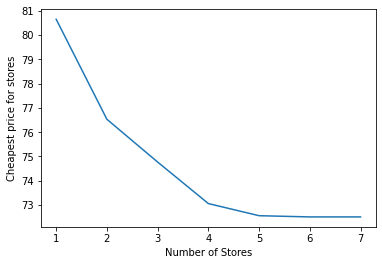

In [23]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.xlabel('Number of Stores')
plt.ylabel('Cheapest price for stores')
plt.show()

### Task Three (Optional) - Using a second dataset, come up with a cheaper basket that is also nutritionally beneficial

First, lets load in and match up the data

In [24]:
!pip install py-stringsimjoin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.8 MB/s 
     |████████████████████████████████| 661 kB 60.8 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724164 sha256=b94d28bbd4aa10cf1761d64631ef91227b2ddf1a79d4a16341d894566d1624ea
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055479 sha256=29d64f4e1b0d1004693061a3c94268a879df98d0fa4abc125a466b3c5b882563
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringsimjoin py-stringmatching


In [25]:
import py_stringsimjoin as ssj
import py_stringmatching as sm

In [26]:
nutrition_df = pd.read_csv('/content/ctm-codebar-nov-22-planning/nutrition_small.csv.gz')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
nutrition_df

,Unnamed: 0,_id,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr
0,2,4530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,"[""whole"",""sweetened"",""chip"",""banana""]",28.570000,3.570000,14.290000,0.000000,536.000000,64.290000,NaN,NaN,"[""en:united-states""]",2
1,3,4559,Peanuts,NaN,NaN,NaN,NaN,"[""glasser"",""torn"",""peanut""]",17.860000,17.860000,17.860000,0.635000,464.000000,60.710000,NaN,NaN,"[""en:united-states""]",3
2,4,16087,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,"[""grizzlie"",""organic"",""nut"",""mix"",""salted""]",57.140000,17.860000,3.570000,1.224280,607.000000,17.860000,NaN,NaN,"[""en:united-states""]",4
3,5,16094,Organic Polenta,NaN,NaN,NaN,NaN,"[""organic"",""polenta"",""red"",""mill"",""bob""]",1.430000,8.570000,NaN,NaN,371.000000,77.140000,NaN,NaN,"[""en:united-states""]",5
4,6,16100,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,NaN,"[""granola"",""gone"",""breadshop"",""unfi"",""nut"",""honey""]",18.270000,13.460000,11.540000,NaN,462.000000,63.460000,NaN,NaN,"[""en:united-states""]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228264,840627,0044100605031,Cow Chow Ice Cream,NaN,NaN,NaN,NaN,"[""cream"",""chow"",""cow"",""ice""]",10.227273,4.545455,21.590909,0.326705,238.636364,31.818182,NaN,NaN,"[""en:united-states""]",840627
228265,840629,0810785020274,Extra Virgin Olive Oil,NaN,NaN,NaN,NaN,"[""extra"",""oil"",""virgin"",""olive""]",93.333333,0.000000,0.000000,0.000000,800.000000,0.000000,NaN,NaN,"[""en:united-states""]",840629
228266,840632,400249284320000299,Choco Hazelnut Bear Cookies,NaN,NaN,NaN,NaN,"[""cookie"",""bear"",""choco"",""hazelnut""]",25.000000,5.000000,25.000000,0.625000,500.000000,65.000000,NaN,NaN,"[""en:united-states""]",840632
228267,840633,0818850020686,seaweed green tea snack,NaN,NaN,NaN,NaN,"[""snack"",""seaweed"",""tea"",""green""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""en:united-states""]",840633


In [28]:
ssj.profile_table_for_join(product_df)

,Unique values,Missing values,Comments
Attribute,,,
id,81670 (100.0%),0 (0.0%),This attribute can be used as a key attribute.
name,78814 (96.5%),0 (0.0%),
measure_quantity,132 (0.16%),68345 (83.68%),Joining on this attribute will ignore 68345 (83.68%) rows.
measure_amount,970 (1.19%),23791 (29.13%),Joining on this attribute will ignore 23791 (29.13%) rows.
measure_unit,93 (0.11%),24276 (29.72%),Joining on this attribute will ignore 24276 (29.72%) rows.
skus,81638 (99.96%),0 (0.0%),
price_count,9 (0.01%),0 (0.0%),


In [29]:
ssj.profile_table_for_join(nutrition_df)

,Unique values,Missing values,Comments
Attribute,,,
Unnamed: 0,228269 (100.0%),0 (0.0%),This attribute can be used as a key attribute.
_id,228225 (99.98%),1 (0.0%),
product_name,121837 (53.37%),0 (0.0%),
compared_to_category,2545 (1.11%),127147 (55.7%),Joining on this attribute will ignore 127147 (55.7%) rows.
categories_tags,8721 (3.82%),122237 (53.55%),Joining on this attribute will ignore 122237 (53.55%) rows.
categories,13769 (6.03%),125876 (55.14%),Joining on this attribute will ignore 125876 (55.14%) rows.
categories_hierarchy,8818 (3.86%),122237 (53.55%),Joining on this attribute will ignore 122237 (53.55%) rows.
_keywords,200081 (87.65%),0 (0.0%),
nutriments.fat_100g,9749 (4.27%),31008 (13.58%),Joining on this attribute will ignore 31008 (13.58%) rows.


In [30]:
nutrition_columns = [
    'nutriments.fat_100g',
    'nutriments.proteins_100g',
    'nutriments.sugars_100g',
    'nutriments.salt_100g',
    'nutriments.energy-kcal_100g',
    'nutriments.carbohydrates_100g'
    ]

nutrition_df['uid'] = range(0, len(nutrition_df))
nutrition_df['has_nutritional_info'] = nutrition_df[nutrition_columns].notna().any(axis='columns')
nutrition_df['is_uk'] = nutrition_df['countries_tags'].apply(lambda x: ('en:united-kingdom' in eval(x)) if isinstance(x, str) else False)
nutrition_df['product_name_lower'] = nutrition_df['product_name'].apply(lambda x: x.lower())
product_df['name_lower'] = product_df['name'].apply(lambda x: x.lower())

In [31]:
alnum_tok = sm.AlphanumericTokenizer(return_set=True)
output_pairs = ssj.jaccard_join(
    product_df, nutrition_df, 
    'id', 'uid', 'name_lower', 'product_name_lower', 
    alnum_tok, 0.6, 
    l_out_attrs=['name'], r_out_attrs=['product_name', 'has_nutritional_info', 'is_uk'])

/usr/local/lib/python3.7/dist-packages/py_stringsimjoin/utils/generic_helper.py:77: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  subset=[join_attr])
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


In [32]:
deduped_pairs = output_pairs.sort_values(['_sim_score', 'r_has_nutritional_info', 'r_is_uk'], ascending=False).drop_duplicates(['l_id'])
deduped_pairs

,_id,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score
2012,2012,22723,3696,Sweet Baby Ray's Barbecue Sauce,Sweet Baby Ray's Barbecue Sauce,True,True,1.0
3769,3769,95105,6942,Candy Canes,Candy canes,True,True,1.0
15472,15472,83092,28005,Jammie Dodgers,Jammie dodgers,True,True,1.0
15474,15474,102044,28006,Cadbury Fingers Milk Chocolate Biscuits,Cadbury Fingers Milk Chocolate Biscuits,True,True,1.0
22606,22606,23100,41077,Diet Coke,Diet Coke,True,True,1.0
...,...,...,...,...,...,...,...,...
139572,139572,75976,225710,M&S Somerset Vintage Cider,Somerset Vintage Cider,False,False,0.6
139573,139573,120190,225710,Chaplin & Corks Somerset Vintage Cider,Somerset Vintage Cider,False,False,0.6
140308,140308,48791,227092,Lynx Africa Body Spray Deodorant,Africa Deodorant Spray,False,False,0.6
140330,140330,31699,227182,Woods Old Navy Rum,Old Captain Navy Rum,False,False,0.6


In [33]:
combined_df = price_df.merge(deduped_pairs,left_on='id',right_on='l_id')
combined_df = combined_df.merge(nutrition_df,left_on='r_uid',right_on='uid')
combined_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,...,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z,54344,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
1,27043,Lucozade Sport Orange,coop,NaN,2.50,NaN,NaN,NaN,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
2,27043,Lucozade Sport Orange,asda,True,3.00,0.15,100.0,ml,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
3,27043,Lucozade Sport Orange,sainsburys,True,3.00,0.15,100.0,ml,2022-10-26T12:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
4,27043,Lucozade Sport Orange,tesco,True,3.00,0.15,100.0,ml,2022-10-26T10:00:00.000Z,54347,...,28.0,6.5,NaN,NaN,"[""en:ireland""]",252019,84528,True,False,lucozade sport orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24305,140564,Schwartz Classic BBQ Seasoning,tesco,True,1.85,4.20,100.0,g,2022-10-26T09:00:00.000Z,55829,...,277.0,38.0,NaN,NaN,"[""en:united-kingdom""]",258637,86313,True,True,schwartz bbq seasoning
24306,140564,Schwartz Classic BBQ Seasoning,coop,NaN,1.95,NaN,NaN,NaN,2022-10-26T09:00:00.000Z,55829,...,277.0,38.0,NaN,NaN,"[""en:united-kingdom""]",258637,86313,True,True,schwartz bbq seasoning
24307,140640,Morrisons Buttermilk,morrisons,True,0.99,0.33,100.0,ml,2022-10-26T14:00:00.000Z,126547,...,41.0,3.6,NaN,NaN,"[""en:united-kingdom""]",745031,202557,True,True,buttermilk morrisons
24308,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z,119806,...,375.0,100.0,NaN,NaN,"[""en:united-states""]",703276,190856,True,False,peach ginger cbd infused drink


In [34]:
combined_filter = (
    combined_df['price_unit_amount'] == 100
    ) & (combined_df['nutriments.energy-kcal_100g'].notna()
    ) & (combined_df['nutriments.energy-kcal_100g'] > 0
    ) & (combined_df['price_per_unit'] > 0
    ) & (combined_df['nutriscore_grade'].isin(['a','b'])
)

df_to_analyse = combined_df[combined_filter].copy(deep=True)

In [35]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


df_to_analyse['price_per_2000kcal'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.energy-kcal_100g']) * 2000
df_to_analyse.sort_values('price_per_2000kcal').head(100)

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score,Unnamed: 0,_id_y,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower,price_per_2000kcal
11536,30135,ASDA No Added Sugar Cherryade,asda,True,0.80,0.04,100.0,ml,2022-10-26T11:00:00.000Z,73098,30135,114974,ASDA No Added Sugar Cherryade,No Added Sugar,True,True,0.600000,438451,5010029226218,No Added Sugar,en:breakfast-cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...",Breakfast cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...","[""swis"",""sugar"",""added"",""breakfast"",""style"",""museli"",""cereal"",""alpen"",""no"",""no-added-sugar""]",5.80,12.00,16.00,0.2800,369.00,63.00,a,-2.0,"[""en:france"",""en:united-kingdom""]",438451,114974,True,True,no added sugar,0.216802
19768,89471,Ocado British Plain Flour,ocado,True,0.58,0.04,100.0,g,2022-10-26T12:00:00.000Z,273,89471,488,Ocado British Plain Flour,British Plain Flour,True,True,0.750000,1193,53327,British Plain Flour,en:cereal-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""beverage"",""potatoe"",""their"",""wheat"",""vegetarian"",""sainsbury"",""and"",""cereal"",""plain"",""product"",...",1.00,9.70,0.50,0.0300,342.00,71.70,a,-4.0,"[""en:united-kingdom""]",1193,488,True,True,british plain flour,0.233918
20078,91906,Ocado British Self Raising Flour,ocado,True,0.58,0.04,100.0,g,2022-10-25T09:00:00.000Z,293,91906,511,Ocado British Self Raising Flour,British Self Raising Flour,True,True,0.800000,1240,88886,British Self Raising Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""their"",""self"",""food"",""and"",""cereal"",""vegetarian"",""mark"",""flour"",""royaume-uni"",""product"",""potat...",1.10,9.50,0.50,0.8300,335.00,69.90,a,-1.0,"[""en:france"",""en:united-kingdom""]",1240,511,True,True,british self raising flour,0.238806
417,133804,Morrisons Plain Flour,morrisons,True,0.75,0.05,100.0,g,2022-10-26T15:00:00.000Z,34511,133804,63869,Morrisons Plain Flour,Plain Flour,True,True,0.666667,177272,27429464,Plain Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""asda"",""and"",""potatoe"",""plain"",""product"",""food"",""cereal"",""vegetarian"",""plant-based"",""their"",""wh...",1.70,9.90,0.50,0.0300,357.00,74.00,a,-5.0,"[""en:united-kingdom""]",177272,63869,True,True,plain flour,0.280112
3298,22357,Daily's Porridge Oats 1kg,sainsburys,True,0.70,0.07,100.0,g,2022-10-26T14:00:00.000Z,87774,22357,134231,Daily's Porridge Oats 1kg,Daily's Porridge Oats,True,True,0.800000,503416,00378208,Daily's Porridge Oats,en:porridge,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:breakfasts"",""en:cereals-and-pot...","Plant-based foods

In [36]:
df_to_analyse['price_per_50g_protein'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.proteins_100g']) * 50
df_to_analyse.sort_values('price_per_50g_protein').head(100)

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date,_id_x,l_id,r_uid,l_name,r_product_name,r_has_nutritional_info,r_is_uk,_sim_score,Unnamed: 0,_id_y,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower,price_per_2000kcal,price_per_50g_protein
11536,30135,ASDA No Added Sugar Cherryade,asda,True,0.80,0.04,100.0,ml,2022-10-26T11:00:00.000Z,73098,30135,114974,ASDA No Added Sugar Cherryade,No Added Sugar,True,True,0.600000,438451,5010029226218,No Added Sugar,en:breakfast-cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...",Breakfast cereals,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:break...","[""swis"",""sugar"",""added"",""breakfast"",""style"",""museli"",""cereal"",""alpen"",""no"",""no-added-sugar""]",5.80,12.00,16.00,0.2800,369.00,63.00,a,-2.0,"[""en:france"",""en:united-kingdom""]",438451,114974,True,True,no added sugar,0.216802,0.166667
19768,89471,Ocado British Plain Flour,ocado,True,0.58,0.04,100.0,g,2022-10-26T12:00:00.000Z,273,89471,488,Ocado British Plain Flour,British Plain Flour,True,True,0.750000,1193,53327,British Plain Flour,en:cereal-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""beverage"",""potatoe"",""their"",""wheat"",""vegetarian"",""sainsbury"",""and"",""cereal"",""plain"",""product"",...",1.00,9.70,0.50,0.0300,342.00,71.70,a,-4.0,"[""en:united-kingdom""]",1193,488,True,True,british plain flour,0.233918,0.206186
20078,91906,Ocado British Self Raising Flour,ocado,True,0.58,0.04,100.0,g,2022-10-25T09:00:00.000Z,293,91906,511,Ocado British Self Raising Flour,British Self Raising Flour,True,True,0.800000,1240,88886,British Self Raising Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""their"",""self"",""food"",""and"",""cereal"",""vegetarian"",""mark"",""flour"",""royaume-uni"",""product"",""potat...",1.10,9.50,0.50,0.8300,335.00,69.90,a,-1.0,"[""en:france"",""en:united-kingdom""]",1240,511,True,True,british self raising flour,0.238806,0.210526
417,133804,Morrisons Plain Flour,morrisons,True,0.75,0.05,100.0,g,2022-10-26T15:00:00.000Z,34511,133804,63869,Morrisons Plain Flour,Plain Flour,True,True,0.666667,177272,27429464,Plain Flour,en:wheat-flours,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Cereals and their prod...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:cerea...","[""asda"",""and"",""potatoe"",""plain"",""product"",""food"",""cereal"",""vegetarian"",""plant-based"",""their"",""wh...",1.70,9.90,0.50,0.0300,357.00,74.00,a,-5.0,"[""en:united-kingdom""]",177272,63869,True,True,plain flour,0.280112,0.252525
3298,22357,Daily's Porridge Oats 1kg,sainsburys,True,0.70,0.07,100.0,g,2022-10-26T14:00:00.000Z,87774,22357,134231,Daily's Porridge Oats 1kg,Daily's Porridge Oats,True,True,0.800000,503416,00378208,Daily's Porridge Oats,en:porridge,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""e

# Task 3 - ML

In [139]:
en_strings = [en for en in nutrition_df['compared_to_category'].unique() if isinstance(en, str) and en.split(':')[0] == 'en']
en_nutrition_df = nutrition_df[nutrition_df['compared_to_category'].isin(en_strings)].copy()
column_counts = en_nutrition_df.groupby('compared_to_category').size().reset_index(name='count')
categories_to_use = column_counts[column_counts['count'] > 100]
categories_to_use

,compared_to_category,count
10,en:alcoholic-beverages,198
22,en:almonds,133
38,en:apple-juices,169
92,en:baking-decorations,525
104,en:barbecue-sauces,253
...,...,...
2334,en:wheat-breads,104
2348,en:white-breads,127
2382,en:whole-milks,115
2397,en:wines,113


In [140]:
categories_to_drop = column_counts[column_counts['count'] < 50]
categories_to_drop

,compared_to_category,count
0,en:1,1
1,en:13-red-wine,1
2,en:70-fat-mayonnaise,1
3,en:acacia-honeys,8
4,en:acid-gummy-candies,17
...,...,...
2412,en:yogurt-with-fruits-and-sugar,3
2414,en:yogurts-with-cereals,2
2415,en:yogurts-with-fruits-and-sugar-no-0-fat,2
2416,en:young-gouda,2


In [141]:
en_nutrition_df['train_category'] = en_nutrition_df['compared_to_category'].apply(lambda x: x if x in categories_to_use['compared_to_category'].values else 'other')
en_nutrition_df = en_nutrition_df[~en_nutrition_df['compared_to_category'].isin(categories_to_drop['compared_to_category'])]
en_nutrition_df

,Unnamed: 0,_id,product_name,compared_to_category,categories_tags,categories,categories_hierarchy,_keywords,nutriments.fat_100g,nutriments.proteins_100g,nutriments.sugars_100g,nutriments.salt_100g,nutriments.energy-kcal_100g,nutriments.carbohydrates_100g,nutriscore_grade,nutriscore_score,countries_tags,new_key_attr,uid,has_nutritional_info,is_uk,product_name_lower,train_category
149,185,20043131,Sliced Plain Bagel,en:bagel-breads,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:bread...","Plant-based foods and beverages, Plant-based foods, Cereals and potatoes, Breads, Special breads...","[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:cereals-and-potatoes"",""en:bread...","[""pain"",""fresh"",""sliced"",""plain"",""easy"",""bagel""]",1.180000,12.940000,4.71,1.196340,365.000000,71.760000,c,3.0,"[""en:united-states""]",185,149,True,False,sliced plain bagel,other
156,205,27533024,Luxury Christmas Pudding,en:christmas-puddings,"[""en:desserts"",""en:puddings"",""en:christmas-puddings""]","Desserts, Puddings, Christmas Puddings","[""en:desserts"",""en:puddings"",""en:christmas-puddings""]","[""pudding"",""luxury"",""special"",""christma"",""dessert"",""extra"",""asda""]",7.000000,3.900000,44.00,0.200000,NaN,54.200000,d,11.0,"[""en:united-kingdom""]",205,156,True,True,luxury christmas pudding,other
157,206,27533048,Luxury Christmas Pudding,en:christmas-puddings,"[""en:snacks"",""en:desserts"",""en:sweet-snacks"",""en:biscuits-and-cakes"",""en:cakes"",""en:puddings"",""e...","Snacks, Desserts, Sweet snacks, Biscuits and cakes, Cakes, Puddings, Christmas Puddings","[""en:snacks"",""en:desserts"",""en:sweet-snacks"",""en:biscuits-and-cakes"",""en:cakes"",""en:puddings"",""e...","[""biscuit"",""luxury"",""pudding"",""cake"",""snack"",""sweet"",""and"",""dessert"",""extra"",""asda"",""special"",""c...",7.000000,3.900000,44.00,0.199898,NaN,54.200000,d,11.0,"[""en:united-kingdom""]",206,157,True,True,luxury christmas pudding,other
165,219,105000196,Apple & Cinnamon Tea,en:teas,"[""en:plant-based-foods-and-beverages"",""en:beverages"",""en:hot-beverages"",""en:plant-based-beverage...","Plant-based foods and beverages, Beverages, Hot beverages, Plant-based beverages, Teas","[""en:plant-based-foods-and-beverages"",""en:beverages"",""en:hot-beverages"",""en:plant-based-beverage...","[""apple"",""tea"",""cinnamon"",""lagg""]",0.000000,66.670000,NaN,0.337820,0.000000,60.000000,NaN,NaN,"[""en:united-states""]",219,165,True,False,apple & cinnamon tea,other
166,220,105000219,"Lagg's, green tea",en:tea-bags,"[""en:plant-based-foods-and-beverages"",""en:beverages"",""en:hot-beverages"",""en:plant-based-beverage...","Plant-based foods and beverages, Beverages, Hot beverages, Plant-based beverages, Teas, Green te...","[""en:plant-based-foods-and-beverages"",""en:beverages"",""en:hot-beverages"",""en:plant-based-beverage...","[""hot"",""lagg"",""tea"",""and"",""plant-based"",""food"",""beverage"",""green"",""bag""]",0.000000,0.000000,NaN,0.000000,0.000000,2.670000,NaN,NaN,"[""en:united-states""]",220,166,True,False,"lagg's, green tea",en:tea-bags
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227811,838937,2000000145182,Granola Apéro Figue & Herbes de Provence - Toomaï - 120g,en:mueslis,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:breakfasts"",""en:cereals-and-pot...",Muesli,"[""en:plant-based-foods-and-beverages"",""en:plant-based-foods"",""en:breakfasts"",""en:cereals-and-pot...","[""additive"",""source"",""vegetarian"",""france"",""oil"",""no"",""aperitif"",""apero"",""vegan"",""de"",""granola"",...",26.600000,11.600000,6.90,0.000000,448.000000,40.200000,a,-1.0,"[""en:france""]",838937,227811,True,False,granola apéro figue & herbes de provence - toomaï - 120g,other
227927,839335,7363887435871,Almond Milk,en:almond-milks,"[""en:plant-based-foods-and-beverages"",""en:beverages"",""en:plant-based-foods"",""e

In [142]:
en_nutrition_df.groupby('train_category').size()

train_category
en:alcoholic-beverages     198
en:almonds                 133
en:apple-juices            169
en:baking-decorations      525
en:barbecue-sauces         253
                          ... 
en:white-breads            127
en:whole-milks             115
en:wines                   113
en:yogurts                 733
other                     7146
Length: 146, dtype: int64

In [143]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval
import numpy as np

In [144]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    en_nutrition_df,
    test_size=test_split,
    stratify=en_nutrition_df["compared_to_category"].values,
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 75250
Number of rows in validation set: 4181
Number of rows in test set: 4181


In [145]:
terms = tf.ragged.constant(categories_to_use['compared_to_category'].values)
lookup = tf.keras.layers.StringLookup(output_mode="one_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_one_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'en:yogurts', 'en:wines', 'en:whole-milks', 'en:white-breads', 'en:wheat-breads', 'en:waters', 'en:vegetable-oils', 'en:vegetable-mixes', 'en:vegetable-fats', 'en:unsweetened-beverages', 'en:tomatoes', 'en:tomato-sauces', 'en:tea-bags', 'en:sweetened-beverages', 'en:sweet-snacks', 'en:sugars', 'en:strawberry-jams', 'en:stews', 'en:spring-waters', 'en:spaghetti', 'en:soy-sauces', 'en:soups', 'en:sodas', 'en:snacks', 'en:smoked-sausages', 'en:skimmed-milks', 'en:simple-syrups', 'en:seeds', 'en:seafood', 'en:sausages', 'en:sauces', 'en:sandwiches', 'en:salty-snacks-made-from-potato', 'en:salted-snacks', 'en:salad-dressings', 'en:roasted-salted-almonds', 'en:roasted-peanuts', 'en:rices', 'en:rice-dishes', 'en:protein-powders', 'en:protein-bars', 'en:prepared-salads', 'en:prepared-meats', 'en:poultries', 'en:potatoes', 'en:potato-crisps', 'en:popcorn', 'en:plant-milks', 'en:plant-based-foods', 'en:plant-based-beverages', 'en:pizzas', 'en:pinto-beans', 'en:pie-dough', 

In [146]:
sample_label = train_df["train_category"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: en:chocolate-candies
Label-binarized representation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [147]:
train_df["product_name_lower"].apply(lambda x: len(x.split(" "))).describe()

count    75250.000000
mean         3.188066
std          1.704804
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         18.000000
Name: product_name_lower, dtype: float64

In [148]:
max_seqlen = 20
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["train_category"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["product_name_lower"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [149]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [150]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_one_hot(label[0])}")
    print(" ")

Abstract: b'greek style corner strawberry '
Label(s): ['en:yogurts']
 
Abstract: b'bravo tortillas hot chilli'
Label(s): ['en:crisps']
 
Abstract: b'extra fine granulated sugar'
Label(s): ['[UNK]']
 
Abstract: b'chicken caesar wrap'
Label(s): ['en:sandwiches']
 
Abstract: b'pie'
Label(s): ['en:cakes']
 


In [151]:
vocabulary = set()
train_df["product_name_lower"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

13001


In [152]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=3, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

In [173]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

Epoch 1/10
588/588 [==============================] - 5s 8ms/step - loss: 0.0364 - categorical_accuracy: 0.4837 - val_loss: 0.0126 - val_categorical_accuracy: 0.6912
Epoch 2/10
588/588 [==============================] - 5s 8ms/step - loss: 0.0115 - categorical_accuracy: 0.7212 - val_loss: 0.0116 - val_categorical_accuracy: 0.7072
Epoch 3/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0096 - categorical_accuracy: 0.7550 - val_loss: 0.0116 - val_categorical_accuracy: 0.7075
Epoch 4/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0087 - categorical_accuracy: 0.7721 - val_loss: 0.0118 - val_categorical_accuracy: 0.7077
Epoch 5/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0082 - categorical_accuracy: 0.7850 - val_loss: 0.0120 - val_categorical_accuracy: 0.7015
Epoch 6/10
588/588 [==============================] - 4s 7ms/step - loss: 0.0077 - categorical_accuracy: 0.7968 - val_loss: 0.0122 - val_categorical_accuracy: 0.7027
Epoc

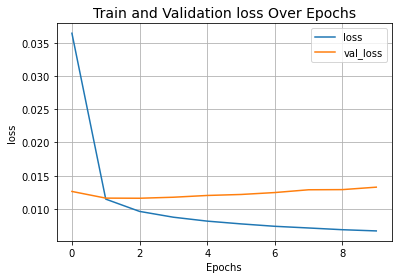

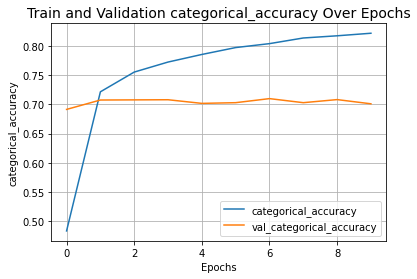

In [174]:
epochs = 10

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("categorical_accuracy")

In [175]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)


33/33 [==============================] - 0s 5ms/step - loss: 0.0134 - categorical_accuracy: 0.7118


In [178]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_one_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [
        x
        for _, x in sorted(
            zip(predicted_probabilities[i], lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:3]
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

4/4 [==============================] - 0s 4ms/step
Abstract: b'popcorn'
Label(s): ['en:popcorn']
Predicted Label(s): (en:snacks, en:popcorn, [UNK])
 
Abstract: b'virgin coconut oil'
Label(s): ['en:coconut-oils']
Predicted Label(s): (en:coconut-oils, en:vegetable-oils, en:pancake-mixes)
 
Abstract: b'tomato basil sauces'
Label(s): ['en:sauces']
Predicted Label(s): (en:sauces, en:hot-sauces, en:pasta-sauces)
 
Abstract: b'watermelon dots'
Label(s): ['en:candies']
Predicted Label(s): (en:fruits-and-vegetables-based-foods, en:confectioneries, en:plant-based-beverages)
 
Abstract: b'flagstone foods, roasted & salted pepitas'
Label(s): ['en:snacks']
Predicted Label(s): (en:snacks, en:seeds, en:popcorn)
 


In [184]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

predicted_probabilities = model_for_inference.predict(product_df['name_lower'].values)

# Perform inference.

predicted_labels = []
for i, predicted_proba in enumerate(predicted_probabilities):
    top_3_labels = [
        x
        for _, x in sorted(
            zip(predicted_proba, lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:3]
    if i % 1000 == 0:
      print('processed {} predictions'.format(i))
    predicted_labels.append(top_3_labels)

2553/2553 [==============================] - 9s 3ms/step
processed 0 predictions
processed 1000 predictions
processed 2000 predictions
processed 3000 predictions
processed 4000 predictions
processed 5000 predictions
processed 6000 predictions
processed 7000 predictions
processed 8000 predictions
processed 9000 predictions
processed 10000 predictions
processed 11000 predictions
processed 12000 predictions
processed 13000 predictions
processed 14000 predictions
processed 15000 predictions
processed 16000 predictions
processed 17000 predictions
processed 18000 predictions
processed 19000 predictions
processed 20000 predictions
processed 21000 predictions
processed 22000 predictions
processed 23000 predictions
processed 24000 predictions
processed 25000 predictions
processed 26000 predictions
processed 27000 predictions
processed 28000 predictions
processed 29000 predictions
processed 30000 predictions
processed 31000 predictions
processed 32000 predictions
processed 33000 predictions
proc

In [187]:
product_df['predicted_labels'] = predicted_labels
product_df

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count,name_lower,predicted_labels
0,20100,Lucozade Sport Orange,NaN,750,ml,"['302012236', '50368011', '1000273982470']",1,lucozade sport orange,"[en:beverages, en:energy-drinks, en:sweetened-beverages]"
1,20101,Red Bull Sugarfree,NaN,473,ml,"['298026024', '7922076', '576040011']",3,red bull sugarfree,"[en:energy-drinks, en:sweetened-beverages, en:beverages]"
2,20102,All Shook Up Spritz Pink Grapefruit & Lavender 250Ml,NaN,NaN,NaN,['305986034'],0,all shook up spritz pink grapefruit & lavender 250ml,"[en:beverages, en:sodas, [UNK]]"
3,20103,Gatorade Orange 500ml,NaN,NaN,NaN,"['287043066', '8008530']",0,gatorade orange 500ml,"[en:sweetened-beverages, en:beverages, en:sodas]"
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,NaN,330,ml,"['272855015', '7720116', '14533011', '343959011', '039714-19668-19669']",3,purdeys rejuvenation fruit drink 330ml,"[en:beverages, en:plant-based-beverages, en:sodas]"
...,...,...,...,...,...,...,...,...,...
81665,149214,TRIP CBD Infused Elderflower Mint,NaN,250,ml,"['8040121', '563191011']",2,trip cbd infused elderflower mint,"[en:candies, en:sodas, [UNK]]"
81666,149215,TRIP CBD Infused Lemon Basil,NaN,250,ml,"['8040125', '563190011']",2,trip cbd infused lemon basil,"[en:condiments, en:snacks, [UNK]]"
81667,149216,TRIP CBD Infused Peach Ginger,NaN,250,ml,"['8040137', '563192011']",2,trip cbd infused peach ginger,"[en:waters, en:sodas, en:plant-based-beverages]"
81668,149596,Smirnoff Red Label Vodka 35cl,NaN,350,ml,"['256554689', '2412368', '119513011']",2,smirnoff red label vodka 35cl,"[[UNK], en:tea-bags, en:beverages]"


In [194]:
bread_products = product_df[product_df['predicted_labels'].apply(lambda x: 'en:white-breads' in x)]
bread_prices = bread_products.merge(price_df,left_on='id',right_on='id')
bread_prices.sort_values('price_per_unit').head(100)

,id,name_x,measure_quantity,measure_amount,measure_unit,skus,price_count,name_lower,predicted_labels,name_y,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
357,128442,Morrisons White Napkins,50.0,NaN,NaN,['349646011'],1,morrisons white napkins,"[[UNK], en:breads, en:white-breads]",Morrisons White Napkins,morrisons,True,1.75,0.035,1.0,each,2022-10-26T16:00:00.000Z
105,32092,Allinson's Strong White Bread Flour,NaN,1000,g,"['2844138', '465547', '40424011', '113066011', '256783233']",5,allinson's strong white bread flour,"[en:white-breads, en:breads, en:plant-based-foods]",Allinson's Strong White Bread Flour,sainsburys,True,1.20,0.080,100.0,g,2022-10-26T14:00:00.000Z
187,54294,M&S Super Soft White Medium Sliced Bread,NaN,800,g,"['7966889', '510649011']",1,m&s super soft white medium sliced bread,"[en:white-breads, en:breads, en:wheat-breads]",M&S Super Soft White Medium Sliced Bread,ocado,True,0.70,0.090,100.0,g,2022-10-26T13:00:00.000Z
279,99619,M&S Super Soft Wholemeal Medium Sliced Bread,NaN,800,g,['510573011'],1,m&s super soft wholemeal medium sliced bread,"[en:breads, en:white-breads, [UNK]]",M&S Super Soft Wholemeal Medium Sliced Bread,ocado,True,0.70,0.090,100.0,g,2022-10-26T09:00:00.000Z
270,98043,M&S Super Soft White Thick Sliced Bread,NaN,800,g,['510721011'],1,m&s super soft white thick sliced bread,"[en:breads, en:white-breads, [UNK]]",M&S Super Soft White Thick Sliced Bread,ocado,True,0.70,0.090,100.0,g,2022-10-26T12:00:00.000Z
280,99938,Ocado British Strong White Bread Flour,NaN,1000,g,['407679011'],1,ocado british strong white bread flour,"[en:white-breads, [UNK], en:breads]",Ocado British Strong White Bread Flour,ocado,True,1.30,0.090,100.0,g,2022-10-26T12:00:00.000Z
159,44214,The BAKERY at ASDA Wholemeal Toastie Thick Sliced Bread,NaN,800,g,['1000002365776'],1,the bakery at asda wholemeal toastie thick sliced bread,"[en:breads, en:white-breads, [UNK]]",The BAKERY at ASDA Wholemeal Toastie Thick Sliced Bread,asda,True,0.80,0.100,100.0,g,2022-10-26T15:00:00.000Z
352,125063,Morrisons Wholemeal Toastie Loaf Bread,NaN,800,g,['114328011'],1,morrisons wholemeal toastie loaf bread,"[en:breads, en:white-breads, [UNK]]",Morrisons Wholemeal Toastie Loaf Bread,morrisons,True,0.79,0.100,100.0,g,2022-10-26T16:00:00.000Z
26,23783,Sainsbury's Thick Soft White Farmhouse 800g,NaN,800,g,['7961677'],1,sainsbury's thick soft white farmhouse 800g,"[en:white-breads, en:breads, [UNK]]",Sainsbury's Thick Soft White Farmhouse 800g,sainsburys,True,0.80,0.100,100.0,g,2022-10-26T11:00:00.000Z
341,116918,Morrisons Wholemeal Medium Bread,NaN,800,g,['114327011'],1,morrisons wholemeal medium bread,"[en:breads, en:white-breads, [UNK]]",Morrisons Wholemeal Medium Bread,morrisons,True,0.79,0.100,100.0,g,2022-10-26T17:00:00.000Z
